<a href="https://colab.research.google.com/github/tohnperfect/KKUMetabolomics/blob/main/KKU_Metabolomics_23_26Sep2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# prompt: run python setup folder from the internet

!git clone https://github.com/tkimhofer/pym8.git
%cd pym8
!pip install -r requirements.txt
!python setup.py install


Cloning into 'pym8'...
remote: Enumerating objects: 1769, done.
remote: Counting objects: 100% (1769/1769), done.
remote: Compressing objects: 100% (1224/1224), done.
remote: Total 1769 (delta 610), reused 1684 (delta 525), pack-reused 0 (from 0)
Receiving objects: 100% (1769/1769), 15.64 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (610/610), done.
/content/pym8
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is depreca

In [3]:
!python -m pip install nmrglue

  Using cached nmrglue-0.10-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 6.7 MB/s eta 0:00:00


In [4]:
### import pym8 package
import sys
# add pym8 to python library path variable
d='/content/pym8'
sys.path.append(d)

In [5]:
from mm8 import reading, preproc, plotting, analyse, utility

In [6]:
# define directory of NMR experiments
path='/content/drive/MyDrive/Metabolomics/leaf_fid'

# determine experiment type and number in directory
# the following code prints out a summary of experiments into the console
# copy 1D NMR experiment type(s) (e.g. PROF_PLASMA_NOESY and PROF_PLASMA_CPMG)
exp = reading.list_exp(path, return_results=True, pr=True)
# example output:
#                 exp   n  size_byte  maxdiff_byte               mtime
# 0       CPMGESGP_PN   8  1048576.0             0 2021-08-24 04:19:00
# 1  PROF_URINE_NOESY  16  1048576.0             0 2021-08-24 04:19:00
# see also function documentation `help(reading.list_exp)`



              exp   n  size_byte               mtime
0  JP_cpmg_64Scan  31     4096.0 2024-09-23 09:10:00


In [7]:
exp

,fid,exp,size,mtime
0,/content/drive/MyDrive/Metabolomics/leaf_fid/66/,JP_cpmg_64Scan,4096,1.727083e+09
1,/content/drive/MyDrive/Metabolomics/leaf_fid/50/,JP_cpmg_64Scan,4096,1.727083e+09
2,/content/drive/MyDrive/Metabolomics/leaf_fid/67/,JP_cpmg_64Scan,4096,1.727083e+09
3,/content/drive/MyDrive/Metabolomics/leaf_fid/56/,JP_cpmg_64Scan,4096,1.727083e+09
4,/content/drive/MyDrive/Metabolomics/leaf_fid/69/,JP_cpmg_64Scan,4096,1.727083e+09
5,/content/drive/MyDrive/Metabolomics/leaf_fid/59/,JP_cpmg_64Scan,4096,1.727083e+09
6,/content/drive/MyDrive/Metabolomics/leaf_fid/34/,JP_cpmg_64Scan,4096,1.727083e+09
7,/content/drive/MyDrive/Metabolomics/leaf_fid/32/,JP_cpmg_64Scan,4096,1.727083e+09
8,/content/drive/MyDrive/Metabolomics/leaf_fid/18/,JP_cpmg_64Scan,4096,1.727083e+09
9,/content/drive/MyDrive/Metabolomics/leaf_fid/29/,JP_cpmg_64Scan,4096,1.727083e+09


In [8]:
# import experiments
X, ppm, meta =  reading.import1d_procs(flist=exp, exp_type=set(exp.exp), eretic=False)


Experiments read-in: 31


In [9]:
X.shape

(31, 65536)

In [10]:
X

array([[13101568.        , 13840384.        , 13654784.        , ...,
          808448.        ,  2142976.        ,  3349504.        ],
       [ 9650801.17914029,  9054988.46709016,  8438382.91423592, ...,
         1365760.        ,  1365760.        ,  1365760.        ],
       [ 4740352.        ,  4740352.        ,  4740352.        , ...,
        -2010553.17054434, -2396683.40747663, -3240486.09747687],
       ...,
       [ 7159808.        ,  7159808.        ,  7159808.        , ...,
         6072903.72440024,  6539407.73630106,  6593387.97662121],
       [ 4420096.        ,  4420096.        ,  4420096.        , ...,
          144498.82820516, -1248311.379424  , -2402067.54691418],
       [ 6442161.72301589,  6195303.02862596,  6157516.84056754, ...,
        -2103552.        , -2103552.        , -2103552.        ]])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

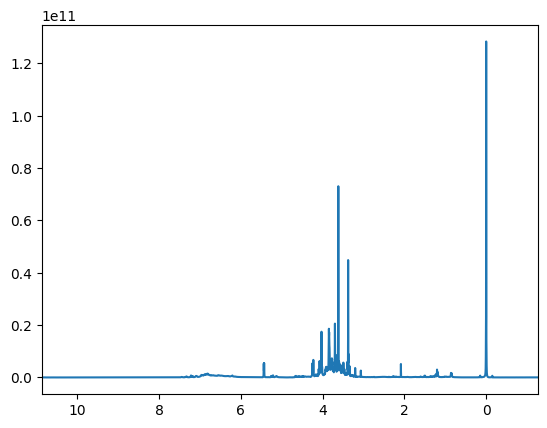

In [11]:
plotting.spec(X[0], ppm) # full ppm range


(<Figure size 640x480 with 1 Axes>, <Axes: >)

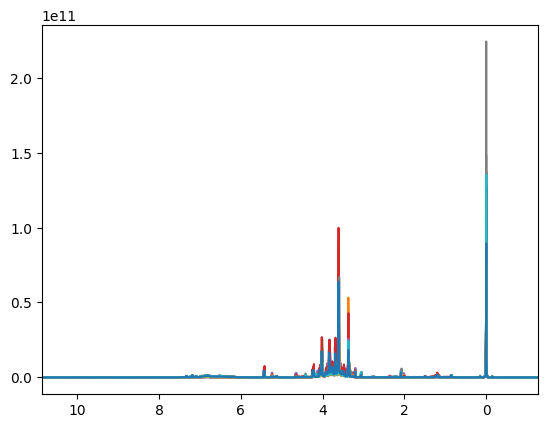

In [12]:
plotting.spec(X, ppm) # full ppm range

(<Figure size 640x480 with 1 Axes>, <Axes: >)

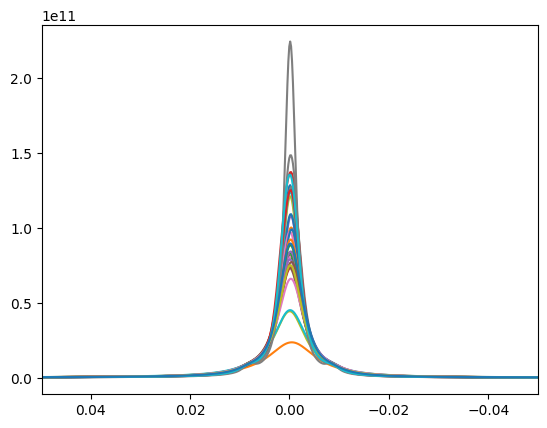

In [13]:
# lets calibrate to tsp
plotting.spec(X, ppm, shift=[-0.05, 0.05])

In [14]:
#cent_ppm = 0.0
#j_hz = 4.0
Xc = utility.calibrate(X = X, ppm = ppm, signal = 'tsp')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

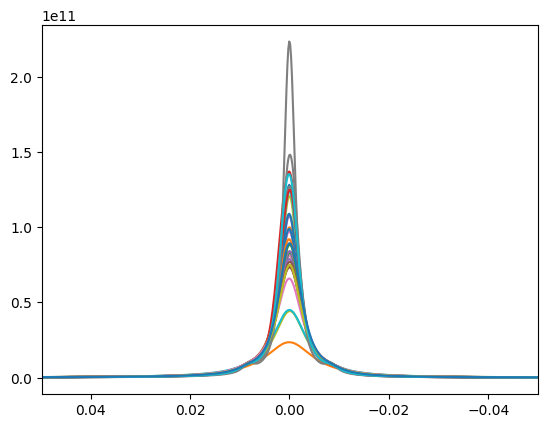

In [15]:
plotting.spec(Xc, ppm, shift=[-0.05, 0.05])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

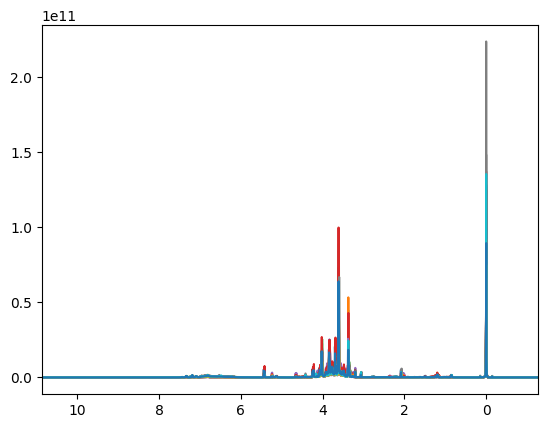

In [16]:
plotting.spec(Xc, ppm)

## align

## excise

# PCA

In [17]:
X_p = pd.read_csv('https://raw.githubusercontent.com/KKUPhenomeCentre/ag-bio/main/src/data/leaf_norm.csv')
ppm_p = pd.read_csv('https://raw.githubusercontent.com/KKUPhenomeCentre/ag-bio/main/src/data/leaf_ppm.csv')
meta_p = pd.read_csv('https://raw.githubusercontent.com/KKUPhenomeCentre/ag-bio/main/src/data/Metadata.csv')

In [18]:
set(meta_p.Class)

{'H+C', 'H+C+R', 'H+D', 'H+D+R', 'QC', 'UH+C', 'UH+C+R', 'UH+D', 'UH+D+R'}

In [19]:
# prompt: create 1 column to the X_p table for the class by using the column Class from meta_p and replace the class with numeric values for class 'H+C', 'H+C+R', 'H+D', 'H+D+R', 'QC', 'UH+C', 'UH+C+R', 'UH+D', 'UH+D+R'

# Create a dictionary to map class names to numeric values
class_mapping = {
    'H+C': 1,
    'H+C+R': 2,
    'H+D': 3,
    'H+D+R': 4,
    'QC': 5,
    'UH+C': 6,
    'UH+C+R': 7,
    'UH+D': 8,
    'UH+D+R': 9
}

# Create a new column 'Class_Numeric' in X_p by mapping the 'Class' column from meta_p
X_p['Class_Numeric'] = meta_p['Class'].map(class_mapping)

# Print the updated X_p table
X_p.head()


,Xaln1,Xaln2,Xaln3,Xaln4,Xaln5,Xaln6,Xaln7,Xaln8,Xaln9,Xaln10,...,Xaln24413,Xaln24414,Xaln24415,Xaln24416,Xaln24417,Xaln24418,Xaln24419,Xaln24420,Xaln24421,Class_Numeric
0,7.351665e+06,7.351665e+06,6.204400e+06,7.184365e+06,6.487551e+06,7.768501e+06,7.768501e+06,7.768501e+06,1.082848e+07,1.082848e+07,...,3.361485e+06,2.247374e+06,-1.812944e+05,5.411031e+05,-2.120448e+06,-4.408530e+06,-2.533568e+06,3.033642e+05,3.033642e+05,5
1,1.247484e+07,1.247484e+07,1.247484e+07,1.247484e+07,1.247484e+07,1.247484e+07,1.365166e+07,1.365166e+07,1.374826e+07,1.398036e+07,...,6.308320e+05,4.970811e+05,-3.878243e+05,-2.028391e+06,-2.369962e+06,-2.162755e+06,-1.371949e+06,-2.200411e+05,8.150410e+05,2
2,4.802901e+06,4.802901e+06,3.979456e+06,4.523466e+06,5.737909e+06,6.872282e+06,7.407110e+06,6.951151e+06,6.924742e+06,7.063530e+06,...,-3.433358e+06,-4.015125e+06,-3.453759e+06,-1.438309e+06,1.834660e+06,4.171560e+06,3.356686e+06,2.494902e+06,4.011622e+06,7
3,9.540643e+06,9.540643e+06,1.154515e+07,1.024067e+07,7.503775e+06,5.800437e+06,5.921111e+06,4.341906e+06,4.341906e+06,7.825942e+06,...,-1.357976e+06,-2.187672e+06,-2.187672e+06,-1.520974e+06,-1.520974e+06,7.060461e+05,2.476410e+06,4.307919e+06,2.887838e+06,5
4,1.502591e+07,1.502591e+07,1.502591e+07,1.294917e+07,8.608452e+06,7.772461e+06,8.100758e+06,5.081112e+06,4.783754e+06,2.944221e+06,...,-6.683624e+05,-6.683624e+05,-6.683624e+05,-6.683624e+05,1.254160e+06,4.056655e+06,3.338690e+06,3.867589e+06,3.703183e+06,7


In [20]:
# prompt: perform PCA with the X_p data and color the data points by the color numeric and give name to each color in the legend as follows,
#     'H+C': 1,
#     'H+C+R': 2,
#     'H+D': 3,
#     'H+D+R': 4,
#     'QC': 5,
#     'UH+C': 6,
#     'UH+C+R': 7,
#     'UH+D': 8,
#     'UH+D+R': 9

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate the features from the target variable
X = X_p.drop('Class_Numeric', axis=1)
y = X_p['Class_Numeric']

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Create a DataFrame with the principal components and the target variable
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)

# Define a dictionary to map numeric class values to colors and labels
color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan'
}
label_map = {
    1: 'H+C',
    2: 'H+C+R',
    3: 'H+D',
    4: 'H+D+R',
    5: 'QC',
    6: 'UH+C',
    7: 'UH+C+R',
    8: 'UH+D',
    9: 'UH+D+R'
}


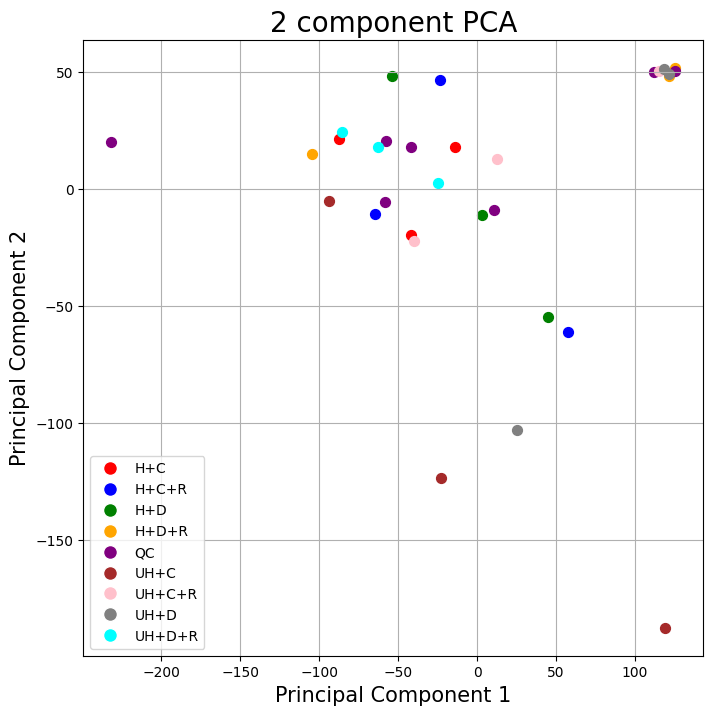

In [23]:
# prompt: plot the data by PC1 and PC2 and color the points by the column Class_numeric and set the legend for each color code as follows,
#  1: 'H+C',
#     2: 'H+C+R',
#     3: 'H+D',
#     4: 'H+D+R',
#     5: 'QC',
#     6: 'UH+C',
#     7: 'UH+C+R',
#     8: 'UH+D',
#     9: 'UH+D+R'

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(set(finalDf['Class_Numeric']))
for target in targets:
    indicesToKeep = finalDf['Class_Numeric'] == target
    ax.scatter(-1*finalDf.loc[indicesToKeep, 'principal component 1'],
               -1*finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color_map[target],
               s = 50)
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label_map[target], markerfacecolor=color_map[target], markersize=10) for target in targets])
ax.grid()


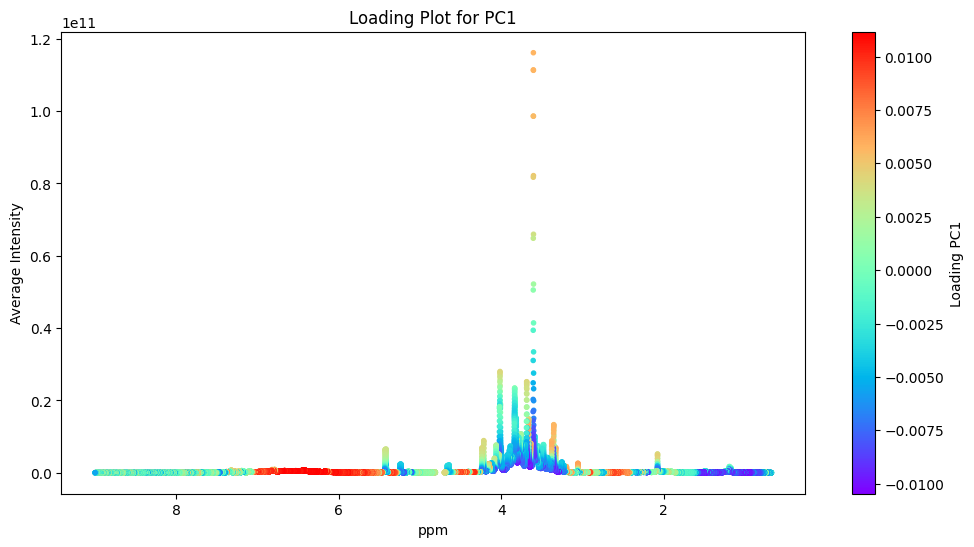

In [22]:
# prompt: create the loading graph for PC1 by X is the ppm_p, Y is the averaged of X_p, and loading is represented by colors. invert X-axis

import matplotlib.pyplot as plt
import numpy as np

# Calculate the average of X_p for each column
avg_X_p = X_p.drop('Class_Numeric', axis=1).mean()

# Get the loadings for PC1
loadings_PC1 = pca.components_[0]

# Create the loading plot
plt.figure(figsize=(12, 6))
plt.scatter(ppm_p.iloc[0,:], avg_X_p, c=loadings_PC1, cmap='rainbow',marker='.')
plt.colorbar(label='Loading PC1')
plt.xlabel('ppm')
plt.ylabel('Average Intensity')
plt.title('Loading Plot for PC1')
plt.gca().invert_xaxis() # Invert X-axis
plt.show()


# Identify Metabolites

In [56]:
def run_stocsy(data, chemical_shifts, driver_peak):
    """
    Run STOCSY analysis on the given data.

    :param data: 2D numpy array, rows are samples, columns are variables (chemical shifts)
    :param chemical_shifts: 1D numpy array of chemical shift values
    :param driver_peak_index: Index of the driver peak in the chemical_shifts array
    :return: correlation coefficients and covariances
    """
    # Extract the driver peak intensities
    #driver_peak = data[:, driver_peak_index]

    # Calculate correlation coefficients and covariances
    correlations = np.array([np.corrcoef(driver_peak*np.ones(data[:, i].shape), data[:, i])[0, 1] for i in range(data.shape[1])])
    covariances = np.array([np.cov(driver_peak*np.ones(data[:, i].shape), data[:, i])[0, 1] for i in range(data.shape[1])])

    return correlations, covariances

def plot_stocsy(data, chemical_shifts, correlations, covariances, driver_peak_shift, x_range = None):
    """
    Plot the STOCSY results.

    :param chemical_shifts: 1D numpy array of chemical shift values
    :param correlations: 1D numpy array of correlation coefficients
    :param covariances: 1D numpy array of covariances
    :param driver_peak_shift: Chemical shift value of the driver peak
    """
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot correlation coefficients
    ax1.plot(chemical_shifts.reshape(correlations.shape), correlations, 'b-', label='Correlation')
    ax1.set_xlabel('Chemical Shift (ppm)')
    ax1.set_ylabel('Correlation Coefficient', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(-1, 1)

    data_mean = np.mean(data,axis=0)
    # Plot covariances on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(chemical_shifts.reshape(correlations.shape), covariances, 'r-', label='Covariance')
    ax2.set_ylabel('Covariance', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    ax3 = ax1.twinx()
    ax3.scatter(chemical_shifts.reshape(correlations.shape),data_mean, c=covariances)

     # Set x-axis range if specified
    if x_range:
        ax1.set_xlim(x_range)
    # Mark the driver peak
    #plt.axvline(x=driver_peak_shift, color='g', linestyle='--', label='Driver Peak')

    plt.title('STOCSY Analysis')
    fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.show()

In [45]:
np.mean(X_p.iloc[:,:-1].to_numpy(),axis=0)

array([8428193.40191208, 8428193.40191208, 8843618.2934684 , ...,
        -30767.62176275,  426740.21230339,  325983.85289774])

In [28]:
X_p.iloc[:,:-1].to_numpy().shape

(31, 24421)

In [32]:
correlations, covariances = run_stocsy(X_p.iloc[:,:-1].to_numpy(), ppm_p.to_numpy(), 3.6044)

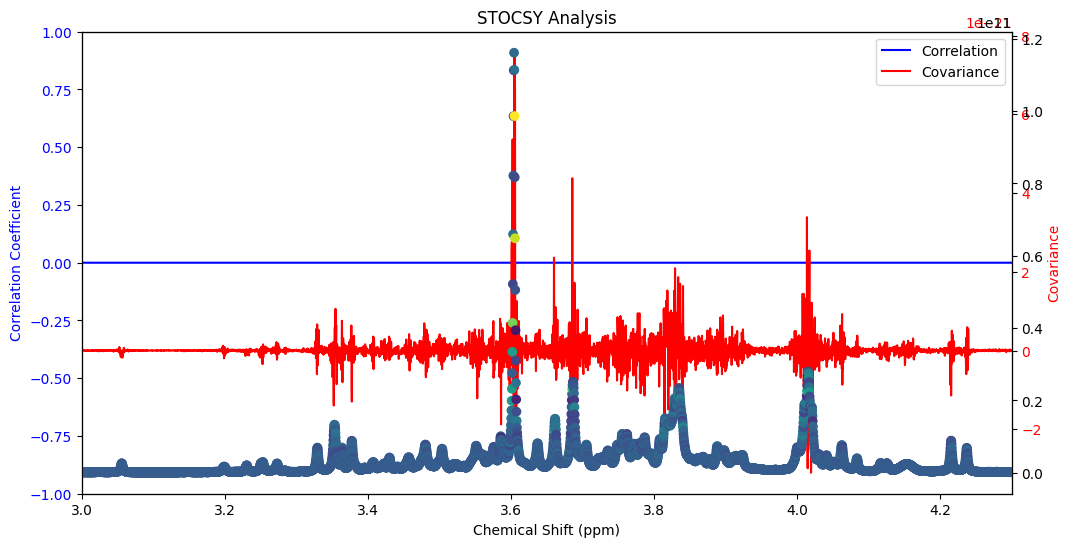

In [58]:
plot_stocsy(X_p.iloc[:,:-1].to_numpy(),ppm_p.to_numpy(), correlations, covariances, 3.6044,(3,4.3))

# Assignment

In [1]:
import pandas as pd
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# prompt: run python setup folder from the internet

!git clone https://github.com/tkimhofer/pym8.git
%cd pym8
!pip install -r requirements.txt
!python setup.py install

Cloning into 'pym8'...
remote: Enumerating objects: 1769, done.
remote: Counting objects: 100% (1769/1769), done.
remote: Compressing objects: 100% (1224/1224), done.
remote: Total 1769 (delta 610), reused 1684 (delta 525), pack-reused 0 (from 0)
Receiving objects: 100% (1769/1769), 15.64 MiB | 4.93 MiB/s, done.
Resolving deltas: 100% (610/610), done.
/content/pym8
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecat

In [3]:
!python -m pip install nmrglue

  Using cached nmrglue-0.10-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 3.9 MB/s eta 0:00:00


In [4]:
### import pym8 package
import sys
# add pym8 to python library path variable
d='/content/pym8'
sys.path.append(d)

In [5]:
from mm8 import reading, preproc, plotting, analyse, utility

## load data

In [6]:
# define directory of NMR experiments
path='/content/drive/MyDrive/Metabolomics/YangNA_L/YangNA_L'

# determine experiment type and number in directory
# the following code prints out a summary of experiments into the console
# copy 1D NMR experiment type(s) (e.g. PROF_PLASMA_NOESY and PROF_PLASMA_CPMG)
exp = reading.list_exp(path, return_results=True, pr=True)

               exp   n  size_byte               mtime
0  JP_cpmg_11feb19  20     4096.0 2024-09-26 02:23:00


In [8]:
exp

,fid,exp,size,mtime
0,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
1,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
2,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
3,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
4,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
5,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
6,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
7,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
8,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09
9,/content/drive/MyDrive/Metabolomics/YangNA_L/Y...,JP_cpmg_11feb19,4096,1.727317e+09


In [9]:
set(exp.exp)

{'JP_cpmg_11feb19'}

In [11]:
# import experiments
X, ppm, meta =  reading.import1d_procs(flist=exp, exp_type=set(exp.exp), eretic=False)


Experiments read-in: 20


In [16]:
X.shape

(20, 65536)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

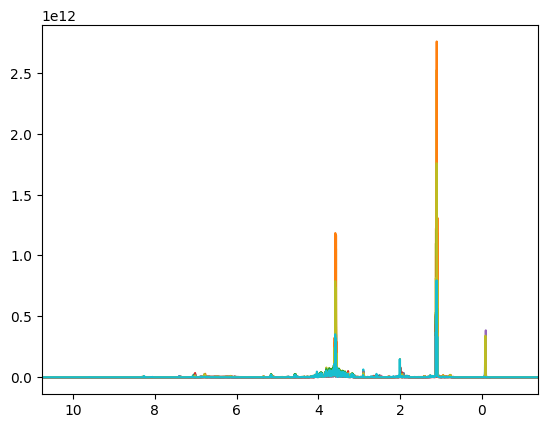

In [12]:
plotting.spec(X, ppm) # full ppm range

## Calibrate TSP

(<Figure size 640x480 with 1 Axes>, <Axes: >)

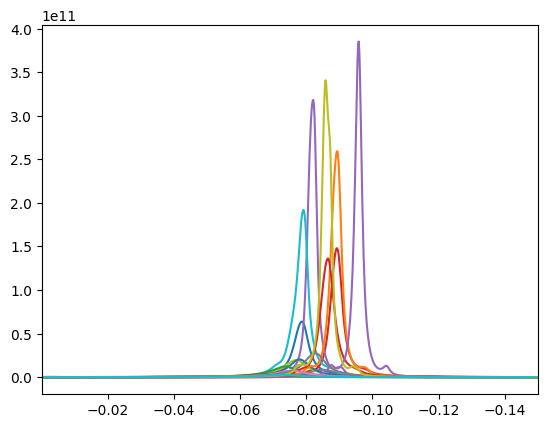

In [15]:

plotting.spec(X, ppm, shift=[-0.15, 0.0])

In [17]:
Xc = utility.calibrate(X = X, ppm = ppm, signal = 'tsp')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

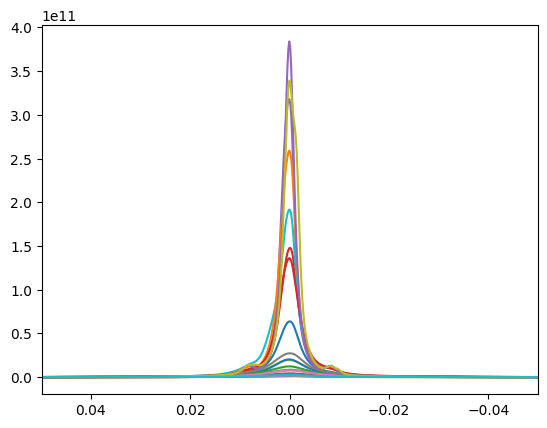

In [19]:
plotting.spec(Xc, ppm, shift=[-0.05, 0.05])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

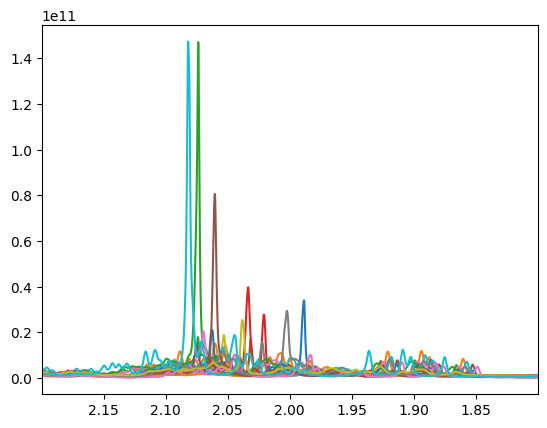

In [23]:
plotting.spec(Xc, ppm, shift=[1.8, 2.2])

In [33]:
Xc.shape

(20, 65536)

LowField Cap

(<Figure size 640x480 with 1 Axes>, <Axes: >)

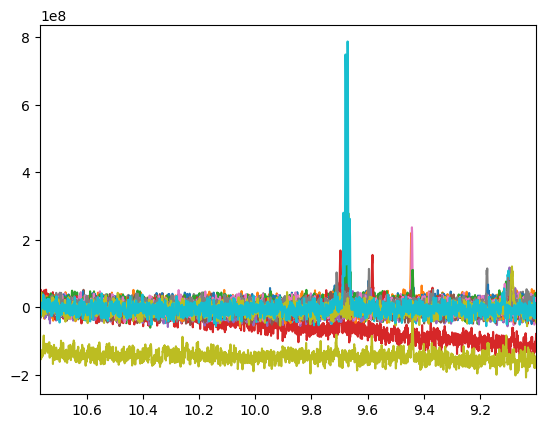

In [36]:
plotting.spec(Xc, ppm, shift=[9, 11])

UpField Cap

(<Figure size 640x480 with 1 Axes>, <Axes: >)

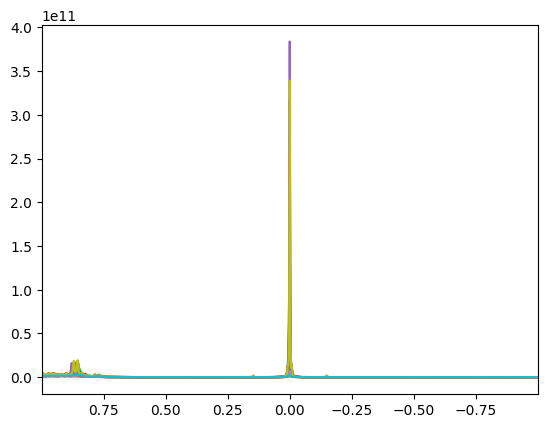

In [35]:
plotting.spec(Xc, ppm, shift=[-1, 1])

## Excise <1 and >9.5

In [61]:
# prompt: find the index of 0 and 9.5 in ppm

import numpy as np
ppm_array = np.array(ppm)
index_1 = np.abs(ppm_array - 0.1).argmin()
index_9_5 = np.abs(ppm_array - 9.5).argmin()
print(f"Index of 1: {index_1}")
print(f"Index of 9.5: {index_9_5}")


Index of 1: 57616
Index of 9.5: 6839


In [62]:
X_pre = Xc[:,index_9_5:index_1+1]
ppm_pre = ppm[index_9_5:index_1+1]

In [63]:
X_pre.shape

(20, 50778)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

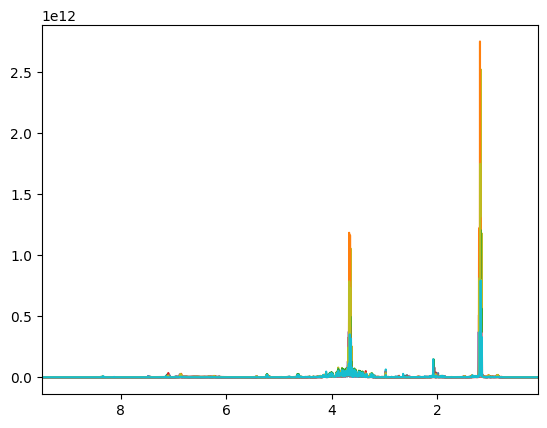

In [64]:
plotting.spec(X_pre, ppm_pre) # full ppm range

In [65]:
X_bl = preproc.bline(X_pre,multiproc=False)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

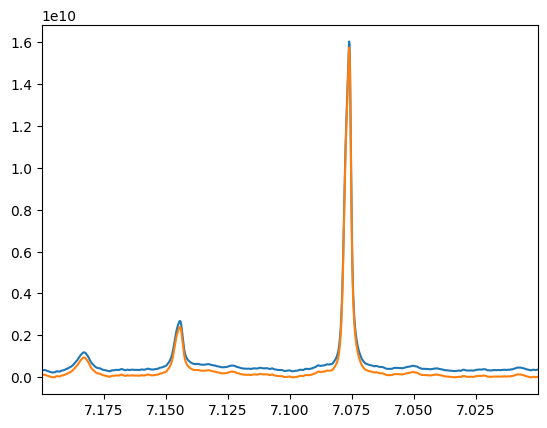

In [66]:
plotting.spec(np.array([X_pre[0,:],X_bl[0,:]]), ppm_pre, shift=[7, 7.2])

In [67]:
X_pqn,dilfs = preproc.pqn(X_bl)

Removing spectrum/spectra (array([], dtype=int64),)


In [68]:
X_pqn.shape

(20, 50778)

In [70]:
from matplotlib import pyplot as plt

(array([3., 2., 3., 8., 1., 1., 1., 1.]),
 array([0.7086491 , 0.80397404, 0.89929897, 0.99462391, 1.08994885,
        1.18527379, 1.28059872, 1.37592366, 1.4712486 ]),
 <BarContainer object of 8 artists>)

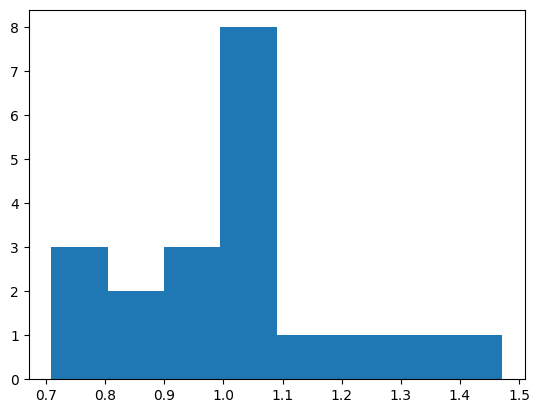

In [83]:
plt.hist(dilfs['median'],bins=8)

In [78]:
dilfs

,median,mean
0,0.876691,1.231751
1,0.783809,1.104828
2,0.870233,1.455682
3,1.130949,1.907880
4,1.085776,1.606368
5,0.958321,1.420565
6,0.937219,1.338199
7,0.941860,1.542158
8,1.049062,1.547383
9,1.471249,2.173568


## perform PCA

In [89]:
pca_model = analyse.pca(X = X_pqn, ppm = ppm_pre, nc = 2, scale = 'uv', center = True)

In [95]:
# prompt: read file /content/drive/MyDrive/Metabolomics/YangNa-L.xlsx

file_path = '/content/drive/MyDrive/Metabolomics/YangNa-L.xlsx'
df = pd.read_excel(file_path)

print(df.head())


   Run order Sample ID  Class  circumference  stature
0          1    L_2Y_1      1            5.8      270
1          2    L_7Y_1      2           36.0      612
2          3   L_15Y_1      3           65.2     1050
3          4   L_25Y_1      4          201.0     2100
4         10    L_2Y_2      1            7.8      300


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



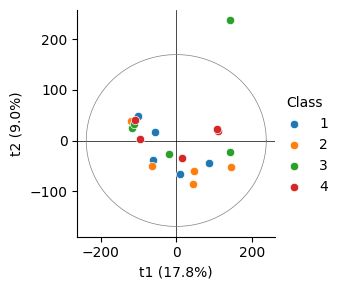

In [99]:
pca_model.plot_scores(an=df,hue = 'Class');

(array([<Axes: >, <Axes: >], dtype=object), <Figure size 640x480 with 3 Axes>)

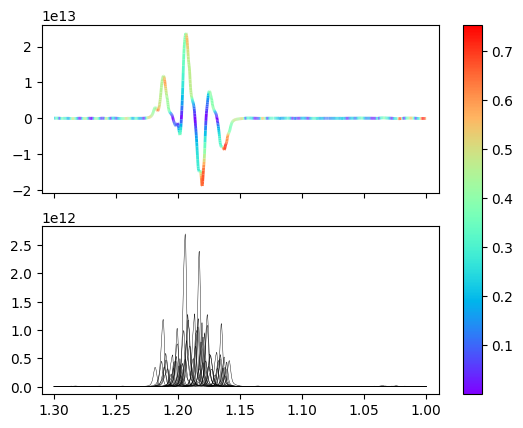

In [105]:
pca_model.plot_load(pc=0,shift=[1.0, 1.3])

(array([<Axes: >, <Axes: >], dtype=object), <Figure size 640x480 with 3 Axes>)

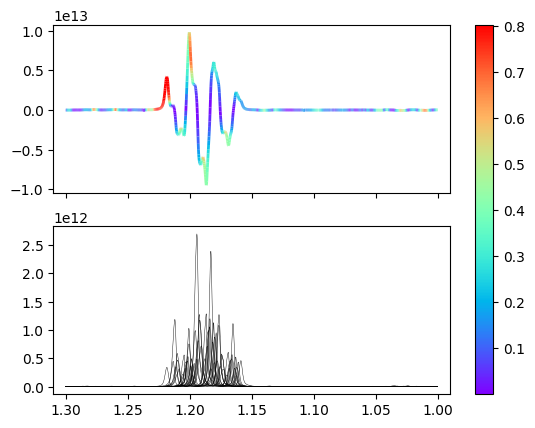

In [106]:
pca_model.plot_load(pc=1,shift=[1.0, 1.3])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

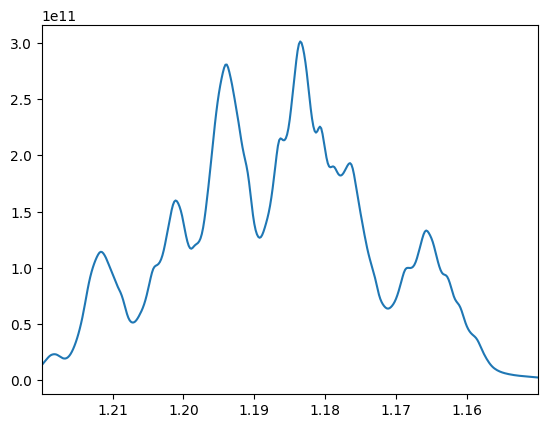

In [108]:
plotting.spec(np.mean(X_pqn,axis=0), ppm_pre, shift=[1.15, 1.22])

In [109]:
stoc = analyse.stocsy(X_pqn, ppm_pre)

(array([<Axes: >, <Axes: >], dtype=object), <Figure size 640x480 with 3 Axes>)

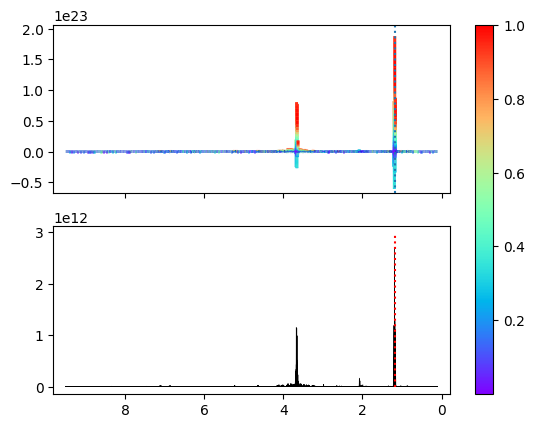

In [112]:
stoc.trace(d = 1.182, shift=[0,4])